# Welcome



# Experiment 1: Toy-dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

## Generating toy dataset

In [9]:
# 1. Generate Toy Dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

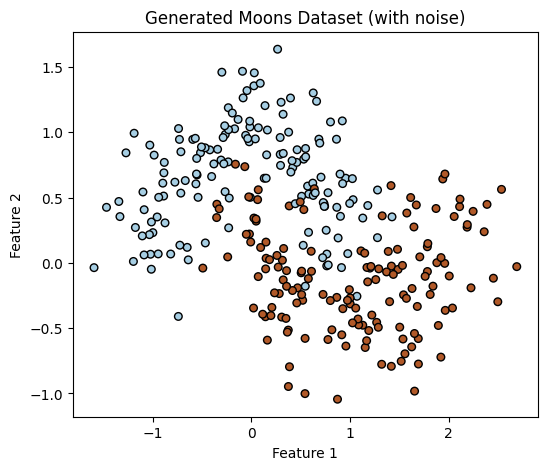

In [10]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor="k", s=30)
plt.title("Generated Moons Dataset (with noise)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Model building

In [6]:
models = {
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric="logloss", random_state=42)
}

## Training and evaluation

In [11]:
from sklearn.metrics import accuracy_score
import time
results = {}

# Train, evaluate, and store results
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {"accuracy": acc, "train_time": train_time, "model": model}

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:44:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Visualization

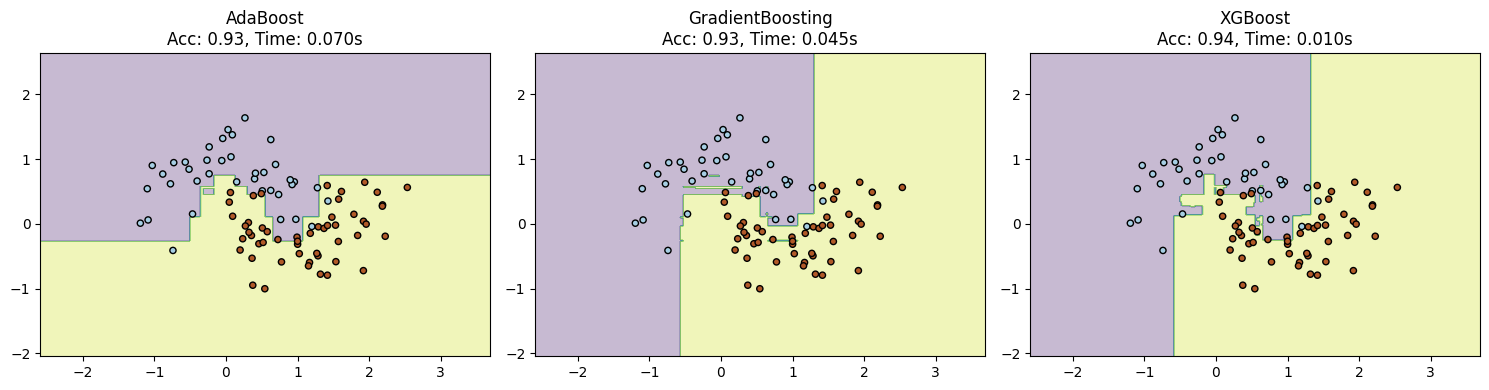

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300))

for ax, (name, res) in zip(axes, results.items()):
    Z = res["model"].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=20, cmap=plt.cm.Paired)
    ax.set_title(f"{name}\nAcc: {res['accuracy']:.2f}, Time: {res['train_time']:.3f}s")

plt.tight_layout()
plt.show()

# Experiment 2: Breast cancer dataset

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

## Dataset loading

In [15]:
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target

In [16]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


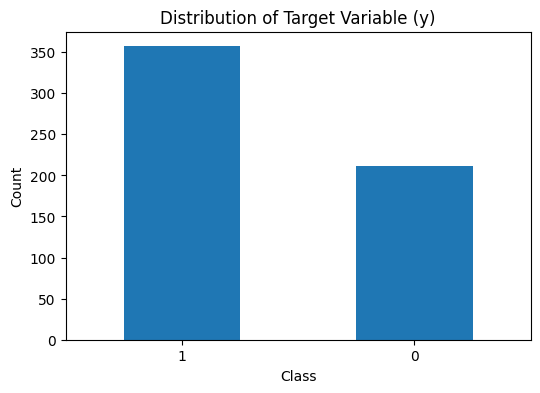

In [17]:
# Count the occurrences of each class in y
class_counts = y.value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar')
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [18]:
data = load_breast_cancer()
X, y = data.data, data.target

## Train-test splitting and scaling

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Define models and evaluate

In [21]:
results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    train_time = end - start

    results[name] = {"Accuracy": acc, "Training Time (s)": train_time}

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:51:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
import pandas as pd

df_results_real = pd.DataFrame(results).T

# caas_jupyter_tools.display_dataframe_to_user("Real-world Dataset Results (Breast Cancer)", df_results_real)
display(df_results_real)

,Accuracy,Training Time (s)
AdaBoost,0.959064,0.146863
GradientBoosting,0.947368,0.223815
XGBoost,0.964912,0.045150
